# Clustering of cars based on brands
#### using K-means

In [75]:
# importing packages
import numpy as np
import pandas as pd

from sklearn import svm

# visualize your data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)    # here we also set the font scale

# beacuse we're running it in browser setup, we need this special library 
# in here to display the graphics in line
%matplotlib inline

In [76]:
# Importing our data
# NB: I downloaded the dataset as an excel file, I then just exported it to csv,
# then imported this csv here
dataset = pd.read_csv('cars.csv')
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [77]:
# Preparing the data
 # we want to remove the last column, because it has the actual models
#X = dataset.iloc[:, :-1]   # take all the rows, and all columns except the last one
#X.head()

# Another method - without using iloc
# print(dataset.columns)   This will show us all the columns. UNCOMMENT it to see
#print(dataset.columns[:-1])    # here it shows us all the columns except the last, we get rid of the brand

# So we now use the above line, below
X_original = dataset[dataset.columns[:-1]]
X = X_original.apply(pd.to_numeric, errors="coerce")    # To convert strings to float, incase some are recorded as string. We dont want an error
                                                    # note that we made a copy, this would cause a problem with "BIG DATA"
X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [78]:
# Eliminating null values
# automatically do this, to prevent noticing null values later, then going back to fix it

for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))   # fill in columns with mean, as int

# Double check
for i in X.columns:    # we want to test for missing data
    print(X[i].isnull().sum())   # checks all rows, sums of null
    
# if zero, it means we have no null values in all the rows



0
0
0
0
0
0
0


C:\Users\caron\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


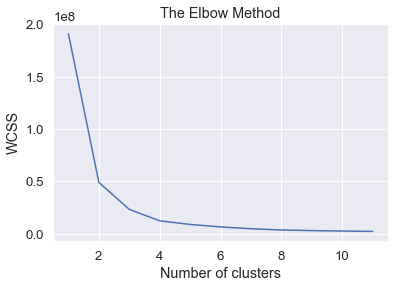

In [79]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []   # empty array

for i in range(1,12):    # range from 1, 12 because from 0,11 gives an error coz of the zero
    # n_clusters=1 how increasing no. of clusters changes our answer, maximum iteration 300,
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  
    
    # Good practise is to run it on sample data and test it there, imagine doing this process 11 times on big data,
    # iterating 11TB of data 11 times, and the k-means itself iterating multiple times , that would be a long process
    
    kmeans.fit(X)  # We take our k means and fit it, we fit our model
    wcss.append(kmeans.inertia_)    # The value we're looking for is inertia, it will give us the value that we need
    
plt.plot(range(1,12), wcss)   
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [80]:
# Our elbow joint is at 2, we can try 3

# Applying k-means to the cars dataset
# we now set n_clusters to 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# we create our own variable for our answers, and we want to fit and predict the k means on this
y_kmeans = kmeans.fit_predict(X)
X = X.to_numpy()   # we're converting it to a row and column setup, before we plot
                   # columns = None, so it's just going to be a matrix of data
    

In [82]:
print(y_kmeans)    # Just to see what we're going to plot

[2 1 0 2 1 2 2 2 0 1 1 1 2 0 0 2 1 0 1 1 1 1 0 2 1 1 1 2 0 1 1 0 1 0 1 0 1
 1 2 0 2 2 0 0 0 1 2 1 1 0 2 0 0 1 2 2 0 1 1 2 0 1 0 1 2 0 1 1 1 2 0 1 1 1
 1 0 0 1 1 1 2 2 0 1 1 1 0 0 1 1 1 1 2 0 1 2 2 0 2 2 2 2 1 1 1 1 1 1 1 0 1
 0 2 1 1 2 0 0 1 2 1 1 2 0 1 1 2 1 1 1 1 1 2 0 2 2 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 2 0 1 0 1 1 1 0 0 2 0 0 1 0 0 1 0 1 1 0 0 1 1 1 2 0 0 1 0 1 2 0 1
 0 0 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 0 0 1 2 1 0 2 0 0 0 1 1 0 1 1 2 1 2 0 0
 2 2 2 1 2 1 1 0 0 1 1 2 0 1 2 0 1 1 2 0 2 1 2 0 2 1 1 1 1 1 0 2 0 1 2 1 0
 0 0]


In [85]:
print(X)   # to see the matrix
# it's harder to plot all different values in an array, so we'll only look at positions 0 and 1, columns 1 and 2

[[1.400e+01 8.000e+00 3.500e+02 ... 4.209e+03 1.200e+01 1.972e+03]
 [3.190e+01 4.000e+00 8.900e+01 ... 1.925e+03 1.400e+01 1.980e+03]
 [1.700e+01 8.000e+00 3.020e+02 ... 3.449e+03 1.100e+01 1.971e+03]
 ...
 [2.200e+01 6.000e+00 2.320e+02 ... 2.835e+03 1.500e+01 1.983e+03]
 [1.800e+01 6.000e+00 2.320e+02 ... 3.288e+03 1.600e+01 1.972e+03]
 [2.200e+01 6.000e+00 2.500e+02 ... 3.353e+03 1.500e+01 1.977e+03]]


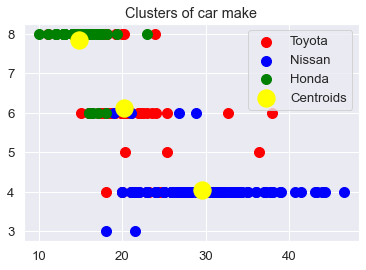

In [87]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Toyota')    
# X values where y_kmeans = 0(1st cluster), and value 0 for x axis
# and same thing, but 1 as the 2nd column
# s=100 is size of the dots

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Nissan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Honda')    
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')   
              # all of them in  1st no, 0, and all in 2nd number    1
plt.title('Clusters of car make')
plt.legend()    # it will automatically bring them in, since we already labelled them
plt.show()



In [88]:
# We see clusters of Honda in Green, Nissan in Blue, Toyota in Red, and the centroids to separate them

In [89]:
# Example, maybe doing loans, you might want to know why is this group not defaulting on their loans
# and why is the last group not defaulting on their loans
# and why is the middle group 50% defaulting on their loans

# Then you find ways to manipulate the data to pull out the answers you want

# The End!